In [1]:
import joblib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import stats

In [2]:
def test(f_loss_file):    
    train_losses = []
    val_losses = []
    val_aurocs = []

    bag_test_aurocs = []

    f_loss = open(f_loss_file)
    count = -1
    params = ''
    for line_loss in f_loss:
        # print(line_loss)
        if count == -1:
            params = line_loss
        count += 1
        if count > 0:
            train_losses.append(float(line_loss.split(', ')[1]))
            val_losses.append(float(line_loss.split(', ')[2]))
            val_aurocs.append(float(line_loss.split(', ')[3]))
            bag_test_aurocs.append(float(line_loss.split(',')[4]))
    # print(len(val_aurocs) - np.argmax(val_aurocs))
    return bag_test_aurocs[np.argmax(val_aurocs)]

1 100.0 abdmil
0.906 (0.877, 0.934)
0.980 (0.972, 0.987)

1 100.0 transmil
0.981 (0.882, 1.081)
0.957 (0.822, 1.091)


2 77.42813263151214 abdmil
0.897 (0.866, 0.928)
0.967 (0.956, 0.978)

2 77.42813263151214 transmil
0.747 (0.692, 0.803)
0.619 (0.479, 0.759)


3 65.32114000422636 abdmil
0.916 (0.890, 0.943)
0.957 (0.947, 0.967)

3 65.32114000422636 transmil
0.654 (0.538, 0.770)
0.554 (0.447, 0.661)


4 56.82253589752474 abdmil
0.919 (0.884, 0.955)
0.954 (0.941, 0.967)

4 56.82253589752474 transmil
0.608 (0.473, 0.743)
0.527 (0.482, 0.571)


5 50.0 abdmil
0.903 (0.873, 0.933)
0.949 (0.932, 0.967)

5 50.0 transmil
0.570 (0.547, 0.594)
0.551 (0.484, 0.619)


6 43.99662845932406 abdmil
0.911 (0.887, 0.936)
0.928 (0.895, 0.960)

6 43.99662845932406 transmil
0.555 (0.457, 0.653)
0.548 (0.514, 0.582)


7 38.2724490086708 abdmil
0.905 (0.877, 0.933)
0.915 (0.876, 0.954)

7 38.2724490086708 transmil
0.554 (0.487, 0.622)
0.489 (0.452, 0.525)


8 32.288005858254884 abdmil
0.909 (0.891, 0.928)
0.

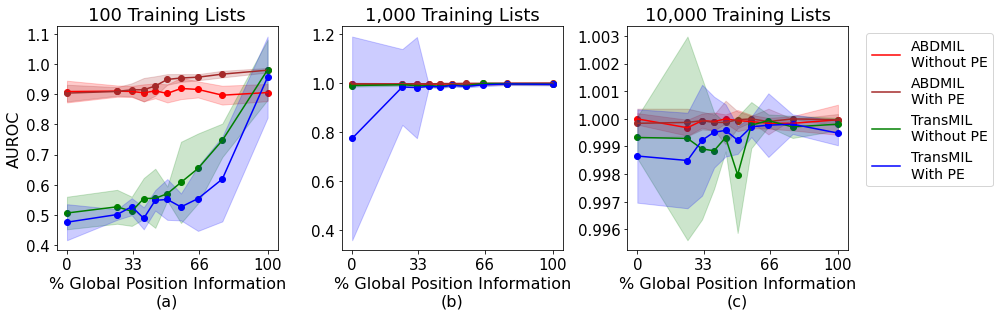

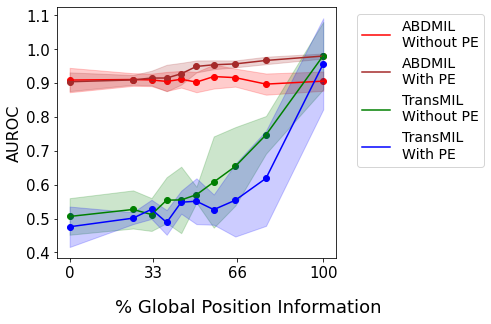

In [3]:
bagrocs = {}
bagrocs_pe = {}
bagrocs_linearpe = {}

bagrocs_iqr = {}
bagrocs_pe_iqr = {}
bagrocs_linearpe_iqr = {}

bagrocs_diff = {}
bagrocs_diff_iqr = {}

bagrocs_diff_pecomp = {}
bagrocs_diff_pecomp_iqr = {}

bagrocs_diff_lintoreg = {}
bagrocs_diff_lintoreg_iqr = {}


gpi = [100.0, 77.42813263151214, 65.32114000422636, 56.82253589752474, 50.0, 43.99662845932406, 38.2724490086708, 32.288005858254884, 25.0, 0.0]
all_models = ['abdmil', 'transmil']

proper_labels1 = ['ABDMIL\nWithout PE', 'TransMIL\nWithout PE']
proper_labels2 = ['ABDMIL\nWith PE', 'TransMIL\nWith PE']
plotted_models = ['abdmil', 'transmil']
colors = ['red', 'green', 'brown', 'blue']

fig, ax = plt.subplots(ncols = 3)
fig.set_figheight(4.5)
fig.set_figwidth(14)

fig2, ax2 = plt.subplots()
fig2.set_figheight(4.5)
fig2.set_figwidth(7)

COUNT = -1
labs = ['a', 'b', 'c']
for num_bags in [100, 1000, 10000]:
    COUNT += 1
    for model in all_models:
        bagrocs[model] = []
        bagrocs_pe[model] = []
        bagrocs_linearpe[model] = []

        bagrocs_iqr[model] = []
        bagrocs_pe_iqr[model] = []
        bagrocs_linearpe_iqr[model] = []

        bagrocs_diff[model] = []
        bagrocs_diff_iqr[model] = []

        bagrocs_diff_pecomp[model] = []
        bagrocs_diff_pecomp_iqr[model] = []

        bagrocs_diff_lintoreg[model] = []
        bagrocs_diff_lintoreg_iqr[model] = []


    for perm_dist in range(1, 11):
        for model in all_models:
            currbr = []
            currbrpe = []
            currbrlinearpe = []
            for seed in range(10):
                if model == 'transmil':
                    nope = 'transformer'
                    linearpe = 'transformer_linearpe'
                    pe = 'transmil'
                else:
                    nope = model
                    pe = model + '_pe'
                    linearpe = model + '_linearpe'

                try:
                    f_loss_file = '../txtfiles/seed%d_numbags%d_MNIST_permdist%d_%s_loss.txt'%(seed, num_bags, perm_dist, nope)
                    currbr.append(test(f_loss_file))
                except:
                    error = 1
                    currbr.append(0)
                try:
                    f_loss_file = '../txtfiles/seed%d_numbags%d_MNIST_permdist%d_%s_loss.txt'%(seed, num_bags, perm_dist, pe)
                    currbrpe.append(test(f_loss_file))
                except:
                    error = 1
                    currbrpe.append(0)

                try:
                    f_loss_file = '../txtfiles/seed%d_numbags%d_MNIST_permdist%d_%s_loss.txt'%(seed, num_bags, perm_dist, linearpe)
                    currbrlinearpe.append(test(f_loss_file))
                except:
                    error = 1
                    currbrlinearpe.append(0)

            print(perm_dist, gpi[perm_dist - 1], model)
            print('%0.3f (%0.3f, %0.3f)'%(np.median(currbr), np.median(currbr) - stats.iqr(currbr), np.median(currbr) + stats.iqr(currbr)))
            print('%0.3f (%0.3f, %0.3f)'%(np.median(currbrpe), np.median(currbrpe) - stats.iqr(currbrpe), np.median(currbrpe) + stats.iqr(currbrpe)))
            
            bagrocs[model].append(np.median(currbr))
            bagrocs_pe[model].append(np.median(currbrpe))
            bagrocs_linearpe[model].append(np.median(currbrlinearpe))

            bagrocs_iqr[model].append(stats.iqr(currbr))
            bagrocs_pe_iqr[model].append(stats.iqr(currbrpe))
            bagrocs_linearpe_iqr[model].append(stats.iqr(currbrlinearpe))

            bagrocs_diff[model].append(np.median(np.array(currbrpe) - np.array(currbr)))
            bagrocs_diff_iqr[model].append(stats.iqr(np.array(currbrpe) - np.array(currbr)))

            bagrocs_diff_pecomp[model].append(np.median(np.array(currbrpe) - np.array(currbrlinearpe)))
            bagrocs_diff_pecomp_iqr[model].append(stats.iqr(np.array(currbrpe) - np.array(currbrlinearpe)))

            bagrocs_diff_lintoreg[model].append(np.median(np.array(currbrlinearpe) - np.array(currbr)))
            bagrocs_diff_lintoreg_iqr[model].append(stats.iqr(np.array(currbrlinearpe) - np.array(currbr)))


            print()
        print()

    for i, model in enumerate(plotted_models):
        ax[COUNT].scatter(gpi, np.array(bagrocs[model]), color = colors[i])
        ax[COUNT].plot(gpi, np.array(bagrocs[model]), label = proper_labels1[i], color = colors[i])
        ax[COUNT].fill_between(gpi, np.array(bagrocs[model]) - np.array(bagrocs_iqr[model]), np.array(bagrocs[model]) + np.array(bagrocs_iqr[model]), alpha=0.2, color = colors[i])

        ax[COUNT].scatter(gpi, np.array(bagrocs_pe[model]), color = colors[i + 2])
        ax[COUNT].plot(gpi, np.array(bagrocs_pe[model]), label = proper_labels2[i], color = colors[i + 2])
        ax[COUNT].fill_between(gpi, np.array(bagrocs_pe[model]) - np.array(bagrocs_pe_iqr[model]), np.array(bagrocs_pe[model]) + np.array(bagrocs_pe_iqr[model]), alpha=0.2, color = colors[i + 2])

    for tick in ax[COUNT].xaxis.get_major_ticks():
        tick.label.set_fontsize(15)
    for tick in ax[COUNT].yaxis.get_major_ticks():
        tick.label.set_fontsize(15)
    ymin, ymax = ax[COUNT].get_ylim()
    xmin, xmax = ax[COUNT].get_xlim()
    ax[COUNT].set_xticks([0, 33, 66, 100], labels = [0, 33, 66, 100])
    ax[COUNT].set_xlabel('% Global Position Information\n' + '(%s)'%labs[COUNT], fontsize=16)
    
    if COUNT == 0:
        for i, model in enumerate(plotted_models):
            ax2.scatter(gpi, np.array(bagrocs[model]), color = colors[i])
            ax2.plot(gpi, np.array(bagrocs[model]), label = proper_labels1[i], color = colors[i])
            ax2.fill_between(gpi, np.array(bagrocs[model]) - np.array(bagrocs_iqr[model]), np.array(bagrocs[model]) + np.array(bagrocs_iqr[model]), alpha=0.2, color = colors[i])

            ax2.scatter(gpi, np.array(bagrocs_pe[model]), color = colors[i + 2])
            ax2.plot(gpi, np.array(bagrocs_pe[model]), label = proper_labels2[i], color = colors[i + 2])
            ax2.fill_between(gpi, np.array(bagrocs_pe[model]) - np.array(bagrocs_pe_iqr[model]), np.array(bagrocs_pe[model]) + np.array(bagrocs_pe_iqr[model]), alpha=0.2, color = colors[i + 2])

        for tick in ax2.xaxis.get_major_ticks():
            tick.label.set_fontsize(15)
        for tick in ax2.yaxis.get_major_ticks():
            tick.label.set_fontsize(15)
        ymin, ymax = ax2.get_ylim()
        xmin, xmax = ax2.get_xlim()
        ax2.set_xticks([0, 33, 66, 100], labels = [0, 33, 66, 100])

ax[2].legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize=14)
ax[0].set_title('100 Training Lists', fontsize=18)
ax[1].set_title('1,000 Training Lists', fontsize=18)
ax[2].set_title('10,000 Training Lists', fontsize=18)
ax[0].set_ylabel('AUROC', fontsize=16)

ax2.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize=14)
ax2.set_ylabel('AUROC', fontsize=16)
ax2.set_ylabel('AUROC', fontsize=16)
fig2.supxlabel('% Global Position Information', fontsize=18)



fig.tight_layout()
fig.savefig('synth_plot.png')


fig2.tight_layout()
fig2.savefig('synth_plot2.png')